In [18]:
#@title Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#@title Get Data

toce_data = pd.read_csv("https://raw.githubusercontent.com/fares-ipgp/toce/main/data/csv/toc_data.csv")
toce_data=toce_data.dropna()
df = toce_data

In [20]:
#@title Numerical features
#@markdown Numerical values. Impute NaN as mean.
# bioturb	amb1	amb2
feature_names = []

columns_numeric = [
                    'depth_m',
                   	#'facies_num',
                    #'bioturb',
                   	#'amb1',
                   	#'amb2'
                    'drx_qz',
                   	'drx_pl',
                   	'drx_fk',
                   	'drx_ca',
                   	'drx_py',
                   	'drx_arc',
                   	'drx_arc_i',
                   	'drx_arc_is',
                   	'drx_arc_cl',
                   	'drx_arc_k'
                   ]

# Numeric feature names
feature_names.extend(columns_numeric)

# Mean imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[columns_numeric] = imp.fit_transform(df[columns_numeric])
df

,sample,depth_m,facies_num,bioturb,amb1,amb2,drx_qz,drx_pl,drx_fk,drx_ca,drx_py,drx_arc,drx_arc_i,drx_arc_is,drx_arc_cl,drx_arc_k,toc,if
1,PEVP1-14,205.0,12,0,0,1,6.0,3.0,1.0,3.0,1.0,3.0,35.0,16.0,49.0,0.0,0.09,0.84
5,PEVP1-9,191.0,12,0,0,1,6.0,4.0,1.0,3.0,0.0,3.0,38.0,14.0,48.0,0.0,0.09,0.80
7,PEVP1-6,173.0,12,0,0,1,6.0,3.0,1.0,2.0,1.0,3.0,29.0,30.0,41.0,0.0,0.09,0.87
10,PEVP1-2,157.0,12,0,0,1,6.0,3.0,1.0,1.0,1.0,3.0,32.0,9.0,58.0,0.0,0.09,0.87
13,PG 60,136.0,10,0,1,0,6.0,3.0,1.0,4.0,0.0,3.0,34.0,21.0,45.0,0.0,1.48,0.71
15,PG 55,131.5,12,0,1,0,6.0,3.0,1.0,2.0,0.0,3.0,39.0,23.0,38.0,0.0,0.60,0.83
19,PG 50,127.0,12,0,1,0,6.0,1.0,1.0,4.0,0.0,3.0,24.0,40.0,36.0,0.0,1.81,0.68
24,PG 42,117.0,12,0,1,0,6.0,1.0,1.0,2.0,0.0,2.0,22.0,21.0,57.0,0.0,0.62,0.86
31,PG 35,112.0,13,1,1,0,6.0,3.0,1.0,3.0,0.0,3.0,38.0,23.0,39.0,0.0,0.58,0.83
35,PG 30,108.0,13,1,1,0,5.0,2.0,1.0,6.0,1.0,3.0,20.0,37.0,43.0,0.0,0.09,0.31


In [21]:
#@title Target { run: "auto" }

columns_target = ['toc','if']
columns_label = ['sample']


In [22]:
#@title Prepare data for training / testing { run: "auto" }

from sklearn.model_selection import train_test_split

# Feature column names
columns_features = columns_numeric 

X = df[columns_features]
y = df[columns_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


In [23]:
#@title Preprocessing pipeline 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class DummyTransformer(BaseEstimator, TransformerMixin):
    '''
    For debugging purposes
    '''

    def __init__(self, X):

      print('Dummy Constructor')
      self.X = X

    def fit(self, X, y=None):

      print('Dummy Fit')
      return self

    def transform(self, X, y=None):
      print('Dummy Transform')
      return X

class MultiHotTransformer(BaseEstimator, TransformerMixin):
    '''
    Encodes categorical data that can take more than one value at the time
    '''

    def __init__(self, X):

      self.X = X
      self.setup(X)

    def setup(self,X):
      
      # Dictionary for storing indexes
      self.d = dict() 
      
      # List for storing column labels
      self.l = list()

      # Iterate over columns
      for col in X:

        #Initialize set
        s = set()

        # Iterate over samples and populate transform
        for x in X[col]:
          # Populate set
         l = str(x).split('|')
         s.update(l)

        # Empty dict
        self.d[col] = dict()

        # Iterate over set and store indexes in dictionary
        for idx, val in enumerate(s):
          self.d[col][val]=idx;
          self.l.append(col+'__'+val)
  
    def fit(self, X, y=None):

      return self

    def transform(self, X, y=None):

      # Initialize return vector  
      X_ret = None
      feats = dict()

      # Iterate over columns
      for col in X:

        feats[col]=[]

        # Iterate over elements 
        for x in X[col]:
          # init feature vector
          feat = np.zeros(len(self.d[col]))
          
          # Split string
          l = str(x).split('|')

          # Iterate over items
          for item in l:
            feat[self.d[col][item]]=1

          feats[col].append(feat)
        
        if X_ret is None:
          X_ret= np.array(feats[col])
        else:
          X_ret=np.hstack((X_ret,np.array(feats[col])))

      return np.array(X_ret)


def build_pre_cols(X,cols):
  '''
  Builds column processors
  '''
  num = StandardScaler()
  cat = MultiHotTransformer(X[cols])
  pre_cols = ColumnTransformer(
      transformers=[
          ('num', num, columns_numeric),
          ('cat', cat, columns_categorical_all),
          ])

  return pre_cols, columns_numeric + cat.l

def build_pre_cols_num(X,cols):
  '''
  Builds column processors
  '''
  num = StandardScaler()
  cat = MultiHotTransformer(X[cols])
  pre_cols = ColumnTransformer(
      transformers=[
          ('num', num, columns_numeric),
          ])

  return pre_cols, columns_numeric + cat.l

# Build column processor
pre_cols_num, _ = build_pre_cols_num(X,columns_numeric)

# Show features
pd.DataFrame(pre_cols_num.fit_transform(X),columns=feature_names)

,depth_m,drx_qz,drx_pl,drx_fk,drx_ca,drx_py,drx_arc,drx_arc_i,drx_arc_is,drx_arc_cl,drx_arc_k
0,2.198922,0.339683,1.193924,0.0,-0.219057,1.620185,0.510754,-0.559872,-1.220876,1.510380,-0.655216
1,1.943504,0.339683,2.430488,0.0,-0.219057,-0.617213,0.510754,-0.330113,-1.405279,1.443508,-0.655216
2,1.615109,0.339683,1.193924,0.0,-0.924906,1.620185,0.510754,-1.019389,0.069946,0.975406,-0.655216
3,1.323203,0.339683,1.193924,0.0,-1.630754,1.620185,0.510754,-0.789630,-1.866287,2.112226,-0.655216
4,0.940076,0.339683,1.193924,0.0,0.486792,-0.617213,0.510754,-0.636458,-0.759868,1.242893,-0.655216
5,0.857978,0.339683,1.193924,0.0,-0.924906,-0.617213,0.510754,-0.253527,-0.575465,0.774790,-0.655216
6,0.775879,0.339683,-1.279204,0.0,0.486792,-0.617213,0.510754,-1.402320,0.991962,0.641047,-0.655216
7,0.593438,0.339683,-1.279204,0.0,-0.924906,-0.617213,-1.957890,-1.555493,-0.759868,2.045354,-0.655216
8,0.502217,0.339683,1.193924,0.0,-0.219057,-0.617213,0.510754,-0.330113,-0.575465,0.841662,-0.655216
9,0.429241,-2.943920,-0.042640,0.0,1.898490,1.620185,0.510754,-1.708665,0.715357,1.109149,-0.655216


Preguntas:

1) Que entradas son mas significativas? Cuáles no aportan nada?

2) Puedo ajustar modelo clasificación? log,knn,svc,rfc
2.1) Que muestras se predicen con mayor error? 

3) Puedo ajustar modelo regresión? lr,knn-r,svr,rfr
3.1) Que muestras se predicen con mayor error?

4) Puedo mejorar el resultado con reducción dimensional?

3) Puedo mejorar el resultado aumentando el set de datos?

4) Se puede plantear predecir un indicador conjunto? Sirve de algo?

In [24]:
# sklearn
# Preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
# Classifiers
from sklearn import neighbors 
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [25]:
#@title Entrenar KNN { run: "auto" }
#@markdown Número de vecinos mas cercanos: 
k = 4 #@param {type:"slider", min:2, max:10, step:1}

def fit_knn(X_train, y_train, k=15):
  '''
  Returns a trained knn data with parameter k
  '''
  clf = neighbors.KNeighborsClassifier(k, weights='uniform')
  clf.fit(X_train, y_train)

  return clf

pca = PCA(n_components=2)
pca.fit(X)

X_train_pca = pca.transform(X)
X_test_pca = pca.transform(X)

clf = fit_knn(X_train_pca, y['toc']>1, k)

clf.get_params()

y_pred = clf.predict(X_train_pca)
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [26]:
#@title Evaluar métricas{ run: "auto" }
def df_merge_shuffle(dfs: list, shuffle=True) -> pd.DataFrame:
  '''
  Given a list of datasets, merge, shuffle and reindex them
  '''
  df_out = None

  for idx, df in enumerate(dfs):
    if idx == 0:
      df_out = df
    else:
      df_out = pd.concat([df_out, df], axis=0)
  
  if shuffle:
    df_out = df_out.sample(frac=1).reset_index(drop=True)
  return df_out 

def calc_metrics(y_true, y_pred) -> dict:
  '''
  Evaluate metrics and return them in a dictionary
  '''
  metrics = {}
  metrics['accuracy']=accuracy_score(y_true,y_pred)
  metrics['f1_score']=f1_score(y_true,y_pred)
  metrics['precision']=precision_score(y_true,y_pred)
  metrics['recall']=recall_score(y_true,y_pred)

  return metrics

def eval_metrics(clf, X_train, y_train, X_val, y_val ) -> dict:
  
  # Trining metrics
  y_pred = clf.predict(X_train)
  train_metrics = calc_metrics(y_train,y_pred)
    
  # Convert to dataset
  df_metrics_train = pd.DataFrame.from_dict([train_metrics], orient='columns')
  df_metrics_train['data'] = 'train'

  # Validation metrics
  y_pred = clf.predict(X_val)
  val_metrics = calc_metrics(y_val,y_pred)
  
  # Convert to dataset
  df_metrics_val = pd.DataFrame.from_dict([val_metrics], orient='columns')
  df_metrics_val['data'] = 'val'

  # Merge data
  df_metrics = df_merge_shuffle([df_metrics_train, df_metrics_val])

  return df_metrics

metrics = eval_metrics(clf, X_train_pca, y['toc']>1, X_test_pca, y['toc']>1)

metrics

,accuracy,f1_score,precision,recall,data
0,0.896552,0.88,0.916667,0.846154,val
1,0.896552,0.88,0.916667,0.846154,train


In [27]:
#@title Graficar resultados{ run: "auto" }

def plot_clf_region(clf, X, y, ax = None):

  # If ax is not passed, get handle
  if ax is None:
    ax = plt.gca()

  # step size in the mesh
  h = .1

  # Create mesh [x_min, m_max]x[y_min, y_max].
  x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
  y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
  a_min= min(x_min,y_min)
  a_max= max(x_max,y_max)

  xx, yy = np.meshgrid(np.arange(a_min, a_max, h), np.arange(a_min, a_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  ax.set_xlim(xx.min(), xx.max())
  ax.set_xlim(yy.min(), yy.max())

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.pcolor(xx, yy, Z, alpha = 0.4, cmap='viridis',edgecolors=None)


def plot_clf_data(clf, X, y, ax = None):

  # If ax is not passed, get handle
  if ax is None:
    ax = plt.gca()

  # Plot also data points
  ax.scatter(X[:,0], X[:,1],c=y,cmap = 'viridis' )

def plot_clf(clf, X_train, y_train, metrics,ax=None):
  
  # If ax is None, het handle
  if ax is None:
    ax=plt.gca()

  # Build title
  title =  'KNN Classifier'
  #title +=f' N={N:d} k={k:d}'

  for data in metrics.data.unique():

    title +=f'\n{data:s}'

    #filter data
    m = metrics[metrics['data']==data]

    # Iterate over columns
    for name in m:
      if name != 'data':
        value = float(m[name])
        title +=f' {name:s}={value:.2f}'

  # Set labels
  ax.set_xlabel('feature0')
  ax.set_ylabel('feature1')
  ax.set_title(title)

  # Plot decision region
  plot_clf_region(clf, X_train, y_train, ax=ax)

  # Plot training data
  plot_clf_data(clf, X_train, y_train, ax=ax)

fig = plt.gcf()
fig.set_size_inches(8,8)
plot_clf(clf, X_train_pca, y['toc']>1, metrics)

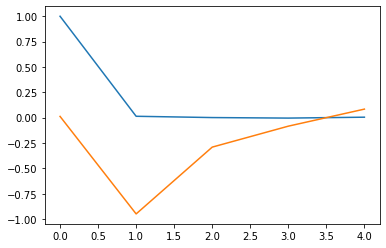

In [ ]:
ax = plt.plot(np.transpose(pca.components_))